In [3]:
%cd drive/MyDrive/DataMining/hw3

/content/drive/MyDrive/DataMining/hw3


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

sns.set_theme(style='whitegrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
actual = pd.read_csv('actual.csv', index_col='patient')
df_train = pd.read_csv('data_set_ALL_AML_train.csv')
df_test = pd.read_csv('data_set_ALL_AML_test.csv')
df_train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [12]:
actual.head()

,cancer
patient,
1,ALL
2,ALL
3,ALL
4,ALL
5,ALL


## a.

In [13]:
def remove_extra_column(df: pd.DataFrame):
    call_columns = [col for col in df.columns if col.startswith('call')]
    df.drop(['Gene Description', 'Gene Accession Number', *call_columns], axis=1, inplace=True)

remove_extra_column(df_train)
remove_extra_column(df_test)
df_train.head()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
0,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,-58,-1,-307,265,-76,215,238,7,106,42,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,88,283,309,12,168,71,55,-2,268,219,...,132,318,325,392,241,193,312,230,330,337
4,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


## b.

In [14]:
df_train = df_train.transpose()
df_test = df_test.transpose()
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [15]:
df_train['y'] = [actual.loc[int(i)]['cancer'] for i in df_train.index]
df_test['y'] = [actual.loc[int(i)]['cancer'] for i in df_test.index]
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,y
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,ALL
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,ALL
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,ALL
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,ALL
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,ALL


## c.

In [16]:
X_train, y_train = df_train.drop('y', axis=1), df_train['y']
X_test, y_test = df_test.drop('y', axis=1), df_test['y']

In [17]:
tsne = TSNE(n_components=2, random_state=0)
embedded_x = tsne.fit_transform(X_train)

embedded = pd.DataFrame(embedded_x, columns=['x1', 'x2'], index=df_train.index)
embedded['y'] = y_train
embedded.head()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,x1,x2,y
1,-53.713413,44.645401,ALL
2,-68.331245,-42.504791,ALL
3,-109.695129,-69.959206,ALL
4,-29.795496,16.602116,ALL
5,42.487637,-14.557184,ALL


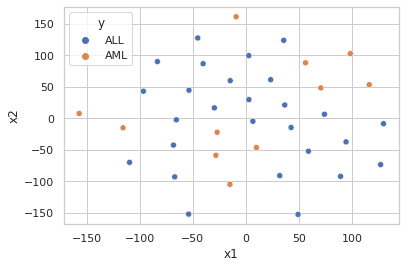

In [18]:
sns.scatterplot(x='x1', y='x2', hue='y', data=embedded)
plt.show()

## d.

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
clf = MLPClassifier(random_state=0).fit(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print(f'MLP test accuracy = {test_accuracy:.3f}')

MLP test accuracy = 0.882


## e.

In [21]:
pca = PCA(n_components=3, random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(38, 3)

In [22]:
clf2 = MLPClassifier(random_state=0).fit(X_train_pca, y_train)
test_accuracy2 = clf2.score(X_test_pca, y_test)
print(f'MLP test accuracy after applying PCA = {test_accuracy2:.3f}')

MLP test accuracy after applying PCA = 0.824


<div dir="rtl">
دقت پس از اعمال
PCA
کاهش یافته!
</div>